In [10]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
sys.path.append('../../')
import Constants as c

In [11]:
file = "calculate_metrics_h2.csv"
df = pd.read_csv(file)

In [12]:
df.drop(df.columns[0], axis=1)
df.dropna(subset=[c.PRED_25], inplace=True)
df.dropna(subset=[c.PRED_50], inplace=True)

In [13]:
# df.describe()

In [14]:
def hypothesisTest_Effort(model, pred, mean):
    print("t-test for: {0}".format(model))
    model_records = df[df[c.MODEL] == model]
    model_records_mean = model_records[pred].mean()
    print("mean: ", model_records_mean)
    ttest_result = ttest_1samp(model_records[pred], mean)
    print("p-value: ", ttest_result.pvalue / 2)

    if ttest_result.pvalue / 2 < 0.10:
        print("Rejecting null hypothesis!")
    else:
        print("Accepting null hypothesis!")
    
    model_records[pred].plot.hist(bins=10, alpha=0.5)


t-test for: Line
mean:  0.32247619047619047
p-value:  0.16986613283413887
Accepting null hypothesis!


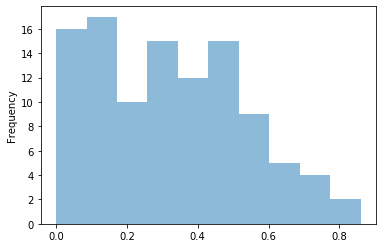

In [15]:
# t-test
hypothesisTest_Effort(c.LINE, c.PRED_25, 0.3025714285714286)

t-test for: Line
mean:  0.5255238095238096
p-value:  0.18547811404572395
Accepting null hypothesis!


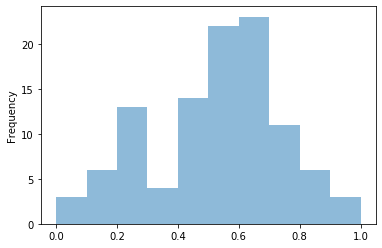

In [16]:
hypothesisTest_Effort(c.LINE, c.PRED_50, 0.5064761904761905)

t-test for: Module
mean:  0.45304761904761903
p-value:  0.14421891022367006
Accepting null hypothesis!


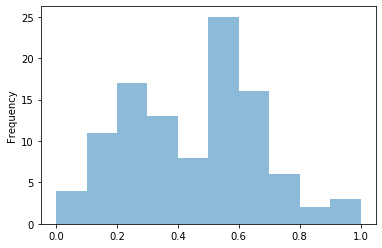

In [17]:
# t-test
hypothesisTest_Effort(c.MODULE, c.PRED_25, 0.42971428571428577)

t-test for: Module
mean:  0.6794285714285713
p-value:  0.09677670914286969
Rejecting null hypothesis!


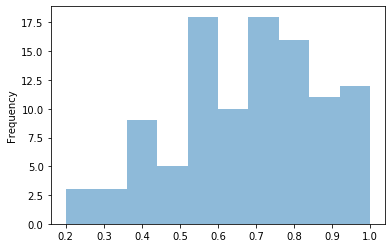

In [18]:
hypothesisTest_Effort(c.MODULE, c.PRED_50, 0.6547619047619048)